In [1]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
House = pd.read_excel(r'C:\Users\Jiya Sharma\Dropbox\PC\Downloads\HousePricePrediction.xlsx')

In [3]:
House.head()

,Id,SIZE,PRICE
0,0,8450,208500.0
1,1,9600,181500.0
2,2,11250,223500.0
3,3,9550,140000.0
4,4,14260,250000.0


In [4]:
House.info() #for judging the datatype of the column data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2919 non-null   int64  
 1   SIZE    2919 non-null   int64  
 2   PRICE   1460 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 68.5 KB


In [5]:
House.columns

Index(['Id', 'SIZE', 'PRICE'], dtype='object')

In [6]:
X=House[['SIZE']]
y=House['PRICE']

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 2)

In [9]:
y_train = y_train.dropna() #removes the rows from y_train where target values are missing (NaN)
X_train = X_train.loc[y_train.index] #will select the rows with non-missing values
try:
    lm = LinearRegression()
    lm.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred: {e}") #here the error occured of the target variable y_train having missing values


In [10]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [11]:
coeff_df #this means that the price is going to increase by 1  then the size increases by 2.409456 when other features like iD are constant

,Coefficient
SIZE,2.409456


In [12]:
predictions = lm.predict(X_test)


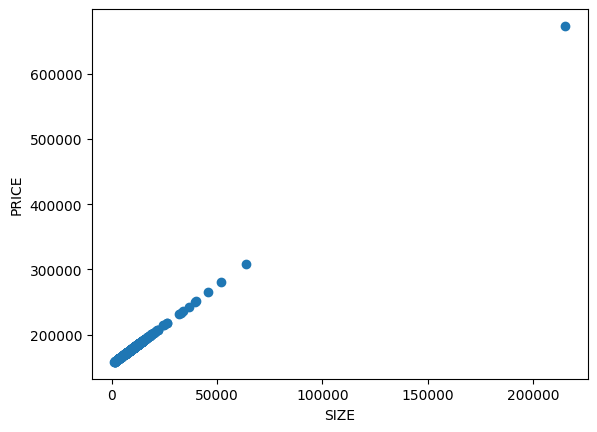

In [13]:
plt.scatter(X_test, predictions)
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

In [14]:
lm.coef_ #coefficient m

array([2.40945585])

In [15]:
lm.intercept_ #intercept c

154977.78486428637

In [16]:
sample = np.array([[2300]])
prediction_new = lm.predict(sample)
print(prediction_new[0])

160519.53331241733


C:\Users\Jiya Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
2.40945585*2300 + 154977.78486428637 #for checking if the predicted value is correct or not using y=m*x+c


160519.53331928636